In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
import random
random.seed(0)

Text(0.5, 1.0, 'Missing Values in Train dataset')

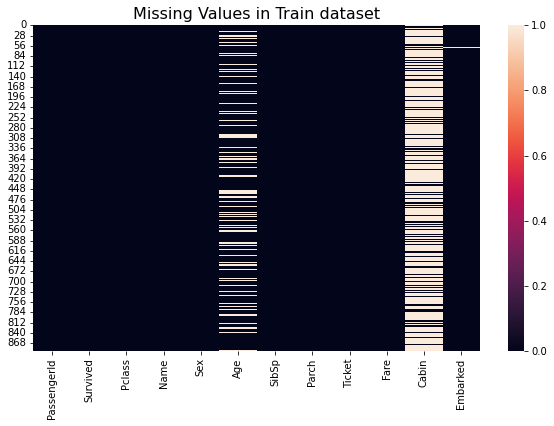

In [5]:
#missing values in train dataset
plt.figure(figsize=(10, 6))
sns.heatmap(train.isnull())
plt.title('Missing Values in Train dataset', size=16)

Text(0.5, 1.0, 'Missing Values in Test dataset')

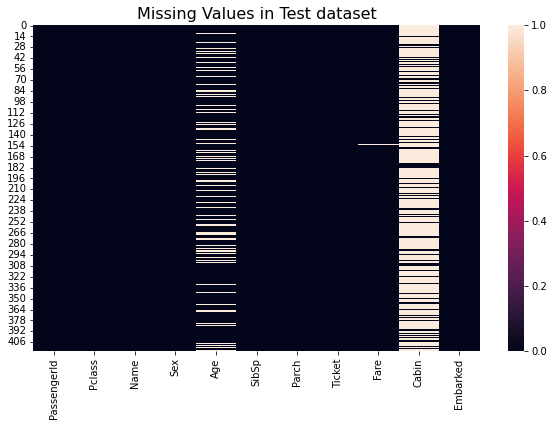

In [6]:
#missing values in test dataset
plt.figure(figsize=(10, 6))
sns.heatmap(test.isnull())
plt.title('Missing Values in Test dataset', size=16)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#dropping passengerid and name column
train.drop(['PassengerId', 'Name'], axis=1, inplace=True)
test.drop(['PassengerId', 'Name'], axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count Plot of Embarked')

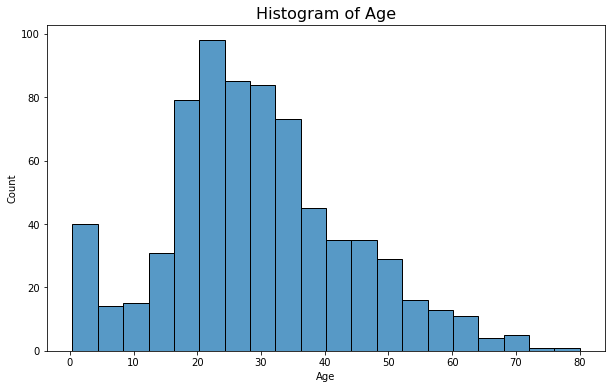

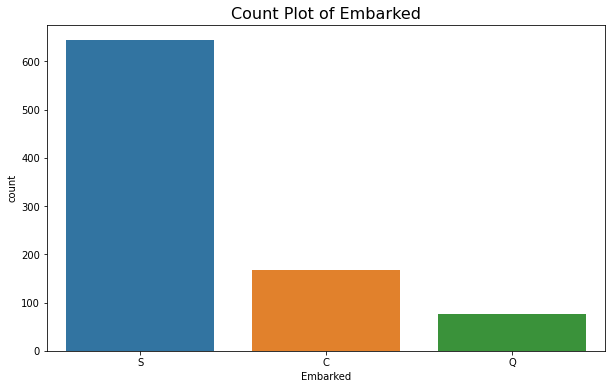

In [9]:
#plotting missing numbers cols of train dataset
plt.figure(figsize=(10, 6))
sns.histplot(train['Age'])
plt.title('Histogram of Age', size=16)
plt.figure(figsize=(10, 6))
sns.countplot('Embarked', data=train)
plt.title('Count Plot of Embarked', size=16)


In [10]:
#imputing missing values
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
train['Age'].fillna(train['Age'].median(), inplace=True)

In [11]:
#describe test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Ticket    418 non-null    object 
 6   Fare      417 non-null    float64
 7   Cabin     91 non-null     object 
 8   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 29.5+ KB


Text(0.5, 1.0, 'Histogram Plot of Fare')

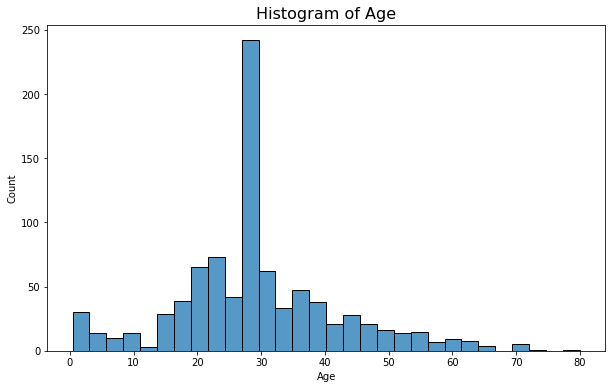

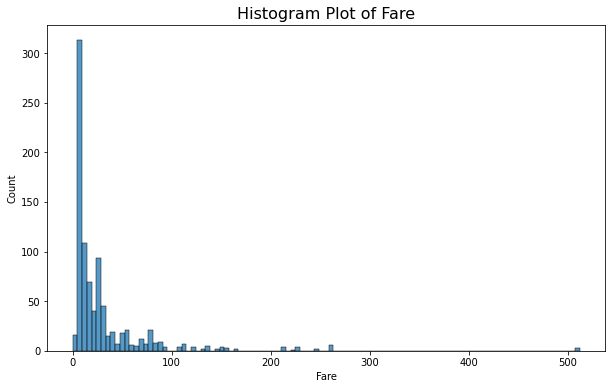

In [12]:
#plotting missing values cols of test dataset
plt.figure(figsize=(10, 6))
sns.histplot(train['Age'])
plt.title('Histogram of Age', size=16)
plt.figure(figsize=(10, 6))
sns.histplot(train['Fare'])
plt.title('Histogram Plot of Fare', size=16)



In [13]:
#imputing missing values 
test['Fare'].fillna(test['Fare'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class of Passenger over Survival')

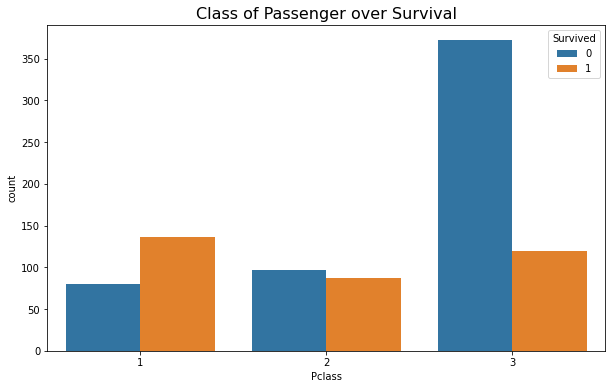

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(train['Pclass'], hue= train['Survived'])
plt.title('Class of Passenger over Survival', size=16)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Embarked with respect to Survival')

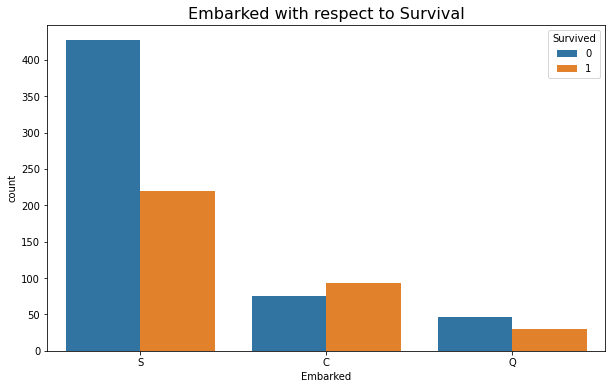

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(train['Embarked'], hue= train['Survived'])
plt.title('Embarked with respect to Survival', size=16)


Text(0.5, 1.0, 'Histogram of Age with respect to Survival')

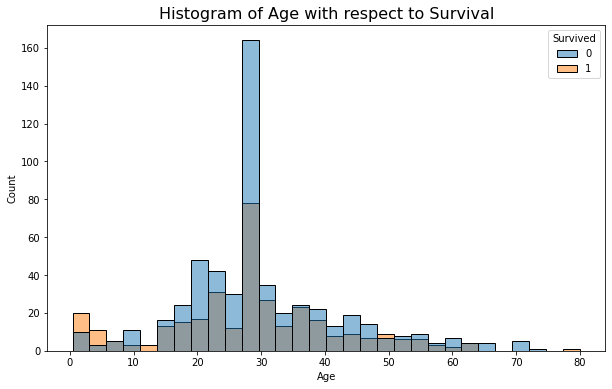

In [16]:

plt.figure(figsize=(10, 6))
sns.histplot(x='Age', hue='Survived', data=train)
plt.title('Histogram of Age with respect to Survival', size=16)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot of Parch with respect to Survival')

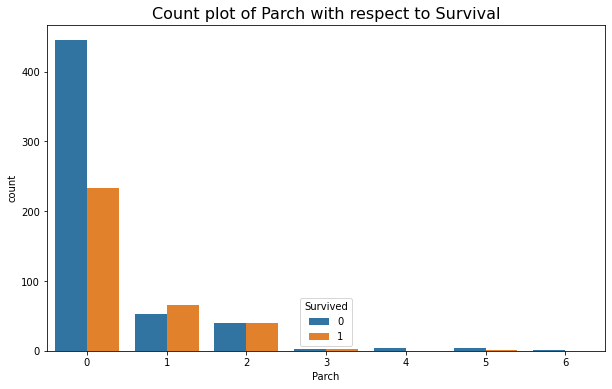

In [17]:
#Count plot of Parch with respect to Survival
plt.figure(figsize=(10, 6))
sns.countplot(train['Parch'], hue= train['Survived'])
plt.title('Count plot of Parch with respect to Survival', size=16)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot of SibSp with respect to Survival')

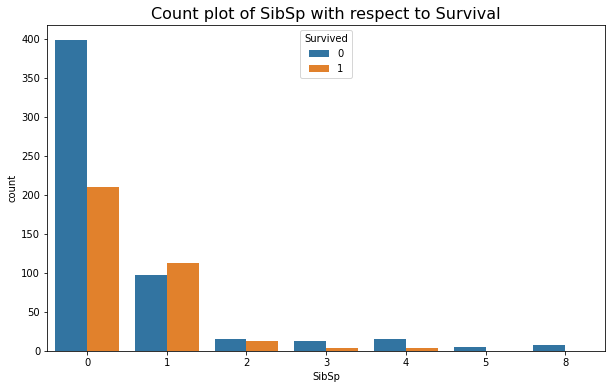

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(train['SibSp'], hue= train['Survived'])
plt.title('Count plot of SibSp with respect to Survival', size=16)


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot of Sex with respect to Survival')

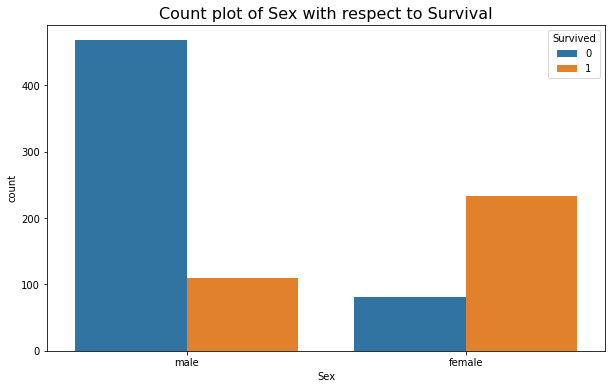

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(train['Sex'], hue= train['Survived'])
plt.title('Count plot of Sex with respect to Survival', size=16)



0    549
1    342
Name: Survived, dtype: int64


Text(0.5, 1.0, 'Class distribution')

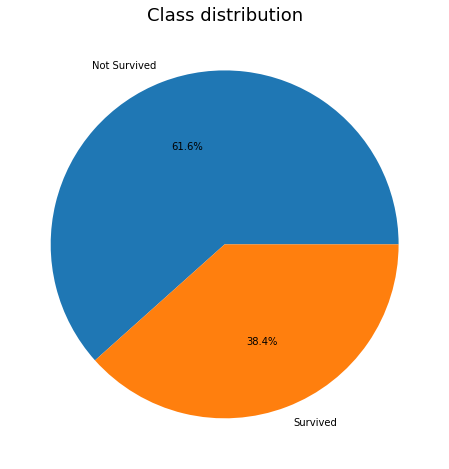

In [20]:
value_counts = train['Survived'].value_counts()
print(value_counts)


plt.figure(figsize=(12,8))
plt.pie(value_counts, labels = ['Not Survived', 'Survived'],autopct='%1.1f%%')
plt.title('Class distribution', size=18)

<AxesSubplot:>

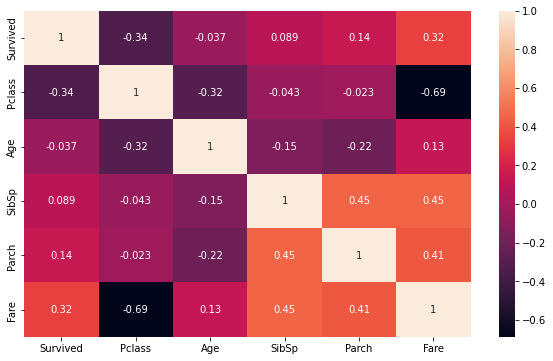

In [21]:
correlation = train.corr(method='spearman')
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True)


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
train_num = [x for x in train.columns if train[x].dtypes!=np.object]
train_num = train[train_num]

vif_data = pd.DataFrame()
vif_data["feature"] = train_num.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(train_num.values, i)
                          for i in range(len(train_num.columns))]
  
print(vif_data)

    feature       VIF
0  Survived  1.623374
1    Pclass  3.714238
2       Age  3.939674
3     SibSp  1.566551
4     Parch  1.555587
5      Fare  1.831183


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [23]:
#train['Cabin'].fillna(train['Cabin'].mode()[0], inplace=True)
#test['Cabin'].fillna(test['Cabin'].mode()[0], inplace=True)

#As Cabin column has maximum null values, we are dropping the entire column
train.drop('Cabin', inplace=True, axis=1)
test.drop('Cabin', inplace=True, axis=1)

In [24]:
print('Nulls in Train dataset : ',train.isnull().sum())
print('*'*80)
print('*'*80)
print('Nulls in Test dataset : ',test.isnull().sum())

Nulls in Train dataset :  Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64
********************************************************************************
********************************************************************************
Nulls in Test dataset :  Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64


<AxesSubplot:xlabel='col_name', ylabel='uniques'>

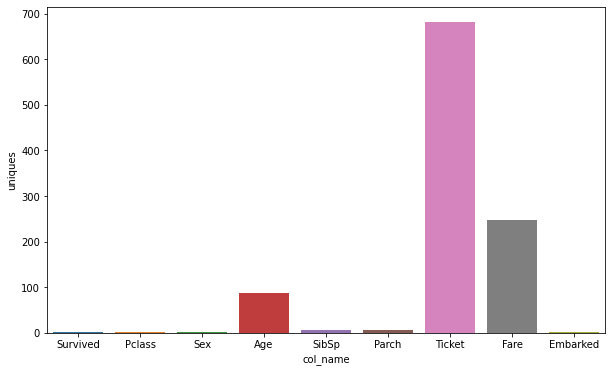

In [25]:
plt.figure(figsize=(10, 6))
df = pd.DataFrame(((col,len(train[col].unique())) for col in train.columns), columns = ['col_name', 'uniques'])
sns.barplot(x = 'col_name', y = 'uniques', data=df)

In [26]:
#ticket cols has many unique classes which can't contribute to classification
train.drop('Ticket', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)

In [27]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
train_transformed = ord_enc.fit_transform(train)
print(train_transformed.shape, train.shape)
print(train_transformed)
train_transformed = pd.DataFrame(train_transformed, columns = train.columns)
y = train_transformed['Survived']
x = train_transformed.drop('Survived', axis=1)

(891, 8) (891, 8)
[[  0.   2.   1. ...   0.  18.   2.]
 [  1.   0.   0. ...   0. 207.   0.]
 [  1.   2.   0. ...   0.  41.   2.]
 ...
 [  0.   2.   0. ...   2. 131.   2.]
 [  1.   0.   1. ...   0. 153.   0.]
 [  0.   2.   1. ...   0.  30.   1.]]


In [28]:
#anova for numerical features
from sklearn.feature_selection import SelectKBest, f_classif, chi2
anova = SelectKBest(f_classif, k='all')
anova.fit(x, y)

feature_names = anova.get_feature_names_out()
p_values = anova.pvalues_
for en in zip(feature_names, p_values):
    if en[1]>0.1:
        print(f'{en[0]} has p_values {en[1]} which is less than significance level')


SibSp has p_values 0.4315092575763657 which is less than significance level


In [29]:
#chi2 for numerical features
chi_sq = SelectKBest(chi2, k='all')
chi_sq.fit(x, y)
feature_names = chi_sq.get_feature_names_out()
p_values = chi_sq.pvalues_
for en in zip(feature_names, p_values):
    if en[1]>0.1:
        print(f'{en[0]} has p_values {en[1]} which is less than significance level')


SibSp has p_values 0.2662355366655962 which is less than significance level


In [30]:
#train.drop(['SibSp'], axis=1, inplace=True)
#test.drop(['SibSp'], axis=1, inplace=True)

train['fam_size'] = train['SibSp'] + train['Parch'] + 1
test['fam_size'] = test['SibSp'] + test['Parch'] + 1

In [31]:
print('Shape of Train: ',train.shape)
print('Shape of Test: ',test.shape)

Shape of Train:  (891, 9)
Shape of Test:  (418, 8)


In [32]:
train.drop(['SibSp', 'Parch'], axis=1, inplace=True)
test.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [33]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'fam_size'], dtype='object')

In [34]:
# from sklearn.preprocessing import StandardScaler
# train_temp = train[['Age', 'Fare']]
# scale= StandardScaler()
# scaled_data = scale.fit_transform(train_temp) 
# scaled_data
# train.drop(['Age', 'Fare'], axis=1, inplace=True)
# train = pd.concat([train, pd.DataFrame(scaled_data, columns=['Age', 'Fare'])], axis=1)
# train

In [35]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import GradientBoostingClassifier  
# Sequential Forward Selection(sfs)

y = train['Survived']
x = pd.get_dummies(train.drop(['Survived'], axis=1), drop_first=True)
sfs = SFS(GradientBoostingClassifier(max_depth=2, learning_rate=0.2),
          k_features=5,
          forward=True,
          floating=False,
          scoring = 'accuracy',
          cv = 5)
sfs.fit(x, y)
sfs.k_feature_names_

('Pclass', 'Age', 'Fare', 'fam_size', 'Sex_male')

In [36]:
data = pd.concat([train, test], axis=0)
data_transformed = pd.get_dummies(data, drop_first=True)
train_transformed = data_transformed.iloc[:train.shape[0], :]
test_transformed = data_transformed.iloc[train.shape[0]:, :]
test_transformed.drop('Survived', axis=1, inplace=True)

y = train_transformed['Survived']
x = train_transformed.drop('Survived', axis=1)

from sklearn.model_selection import train_test_split, GridSearchCV
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.1, random_state=1234)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
import keras_tuner
from tensorflow import keras
from keras import layers

In [38]:
def build_model(hp):
    inputs = keras.Input(shape=(7,))
    hd6 = layers.Dense(hp.Choice('units1', [4, 8, 16, 32, 64]),activation='relu')(inputs)
    hd5 = layers.Dense(hp.Choice('units2', [4, 8, 16, 32, 64]),activation='relu')(hd6)
    hd4 = layers.Dense(hp.Choice('units3', [4, 8, 16, 32, 64]),activation='relu')(hd5)
    outputs = layers.Dense(1,activation='sigmoid')(hd4)
    
    model = keras.Model(inputs=inputs, outputs=outputs)
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-1, sampling="log")
    model.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=learning_rate), metrics = ("accuracy"))
    return model

In [39]:
tuner = keras_tuner.RandomSearch(build_model, objective = 'val_accuracy', max_trials=5, executions_per_trial=2)
tuner.search_space_summary()

2022-09-07 16:50:30.154707: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-07 16:50:30.314243: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-07 16:50:30.315037: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-07 16:50:30.317033: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Search space summary
Default search space size: 4
units1 (Choice)
{'default': 4, 'conditions': [], 'values': [4, 8, 16, 32, 64], 'ordered': True}
units2 (Choice)
{'default': 4, 'conditions': [], 'values': [4, 8, 16, 32, 64], 'ordered': True}
units3 (Choice)
{'default': 4, 'conditions': [], 'values': [4, 8, 16, 32, 64], 'ordered': True}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.1, 'step': None, 'sampling': 'log'}


2022-09-07 16:50:30.317418: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-07 16:50:30.318400: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-07 16:50:30.319302: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-07 16:50:32.620462: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-07 16:50:32.621368: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [40]:
tuner.search(xtrain, ytrain, epochs=50, validation_data=(xtest, ytest), verbose=1)

Trial 5 Complete [00h 00m 16s]
val_accuracy: 0.7333333492279053

Best val_accuracy So Far: 0.8444444537162781
Total elapsed time: 00h 01m 03s


In [41]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
units1: 8
units2: 32
units3: 32
lr: 0.002215044868813457
Score: 0.8444444537162781
Trial summary
Hyperparameters:
units1: 16
units2: 64
units3: 4
lr: 0.00010268621446033615
Score: 0.7333333492279053
Trial summary
Hyperparameters:
units1: 4
units2: 4
units3: 32
lr: 0.0007103814980367534
Score: 0.7111111283302307
Trial summary
Hyperparameters:
units1: 4
units2: 4
units3: 4
lr: 0.0025712001205139743
Score: 0.699999988079071
Trial summary
Hyperparameters:
units1: 64
units2: 8
units3: 32
lr: 0.024136809912189375
Score: 0.6500000059604645


In [42]:
tuner.get_best_hyperparameters()

In [43]:
models = tuner.get_best_models(num_models=2)
best_model = models[0]
best_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 7)]               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 64        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [44]:
result = [1 if x[0]>0.5 else 0 for x in best_model.predict(test_transformed)]
sample = pd.read_csv('../input/titanic/gender_submission.csv')
sample['Survived'] = result
sample.to_csv('sample.csv', index=False)

In [45]:
!rm -r ./untitled_project